In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

plt.style.use('themes/rose-pine-moon.mplstyle')


%config InlineBackend.figure_format='svg'

In [2]:
# Load the data
data = pd.read_feather('data/temp/data.feather')

In [3]:
print(len(data))
data.head()


1821316


,date,primaryTime,emulated,name,releaseDate,name_category,name_user,location,platform_name
8,2021-12-22,449.533,False,RE:RUN,2020-08-08,Any%,quebecpower,ca/qc,PC
9,2019-02-09,194.000,False,Time Warpers,2018-11-02,Zones 1-100,_zuR,br,PC
11,2014-11-17,857.000,True,Kirby's Dream Land,1992-04-27,Normal Mode,SapphireYoshi,us,Game Boy
12,2014-11-17,3062.000,False,Kirby: Nightmare in Dream Land,2002-10-25,Any%,SapphireYoshi,us,Game Boy Advance
13,2014-11-17,2454.000,False,Kirby & The Amazing Mirror,2004-04-15,Any%,SapphireYoshi,us,Game Boy Advance


/var/folders/l8/7h5sfbjn2ng3kg7y8p21r8qr0000gn/T/ipykernel_50097/914766268.py:18: UserWarning: 
The palette list has fewer values (1) than needed (233) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x="date", y="primaryTime", hue="name_user", alpha=0.2, marker='.', palette=['C1'], markerfacecolor='C1', markersize=4, markeredgewidth=0, linewidth=0.5)
/var/folders/l8/7h5sfbjn2ng3kg7y8p21r8qr0000gn/T/ipykernel_50097/914766268.py:24: UserWarning: 
The palette list has fewer values (1) than needed (233) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=best_time, x="date", y="primaryTime", hue="name_user", alpha=1, marker='.', palette=['C2'], markerfacecolor='C2', markersize=4, markeredgewidth=0, linewidth=0.5)


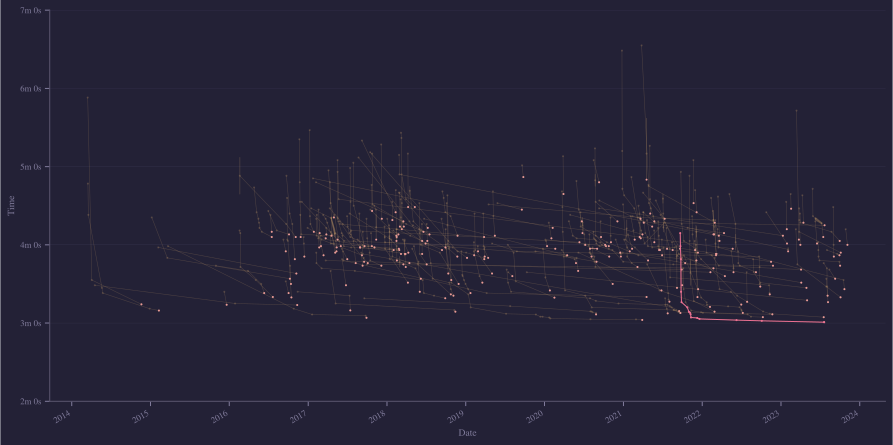

In [4]:
# Only keep 'super mario bros. 3' data
data = data[data['name'] == 'Super Mario Bros. 3']

# Only keep Any% data
data = data[data['name_category'] == 'Any%']

# Sort by primaryTime
data = data.sort_values(by='primaryTime')

# Remove name_user which only have 1 run
data = data.groupby('name_user').filter(lambda x: len(x) > 1)

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# do a lineplot with markers
plt.figure(figsize=(15,8))
sns.lineplot(data=data, x="date", y="primaryTime", hue="name_user", alpha=0.2, marker='.', palette=['C1'], markerfacecolor='C1', markersize=4, markeredgewidth=0, linewidth=0.5)

# Add a lineplot highlighted for the best time
best_time = data.groupby('name_user')['primaryTime'].min()
best_time = best_time.reset_index()
best_time = best_time.merge(data, on=['name_user', 'primaryTime'])
sns.lineplot(data=best_time, x="date", y="primaryTime", hue="name_user", alpha=1, marker='.', palette=['C2'], markerfacecolor='C2', markersize=4, markeredgewidth=0, linewidth=0.5)

# Highlight the whole history of the user with the best absolute time
best_time = best_time.sort_values(by='primaryTime')
best_time = best_time.iloc[0]
sns.lineplot(data=data[data['name_user'] == best_time['name_user']], x="date", y="primaryTime", hue="name_user", alpha=1, marker='.', palette=['C6'], markerfacecolor='C6', markersize=4, markeredgewidth=0, linewidth=1)

# Convert the x-axis labels to dates
plt.gcf().autofmt_xdate()

# Convert the y-axis labels minutes and seconds (range from 2mn to 8mn)
plt.yticks(range(120, 480, 60), [f"{i//60}m {i%60}s" for i in range(120, 480, 60)])

# Remove legend
plt.legend([],[], frameon=False)

# Set the x-axis label
plt.xlabel("Date")

# Set the y-axis label
plt.ylabel("Time")

plt.show()
#plt.savefig('output/plot.svg', format='svg')
